
----- Training Models for All Features -----

Gradient Boosting Ensemble (All Features) Metrics:
Accuracy: 0.9668664130686875
Precision: 0.9904611077391497
Recall: 0.9668664130686875
F1 Score: 0.977287058549388


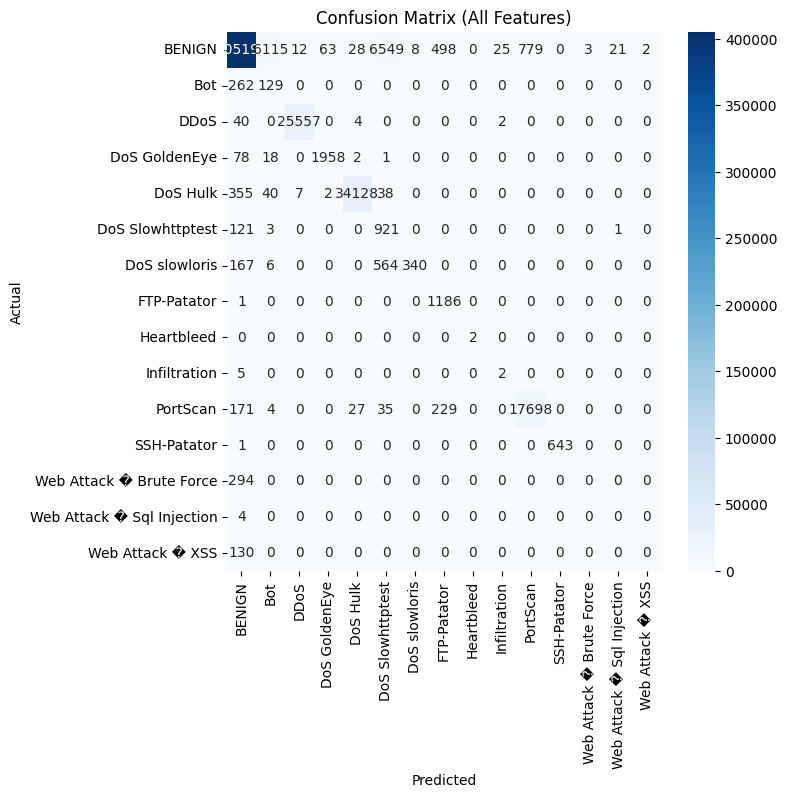


----- Training Models for IG Top 5 Features -----

Gradient Boosting Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.971762611675947
Precision: 0.9866974970948296
Recall: 0.971762611675947
F1 Score: 0.9787200318560636


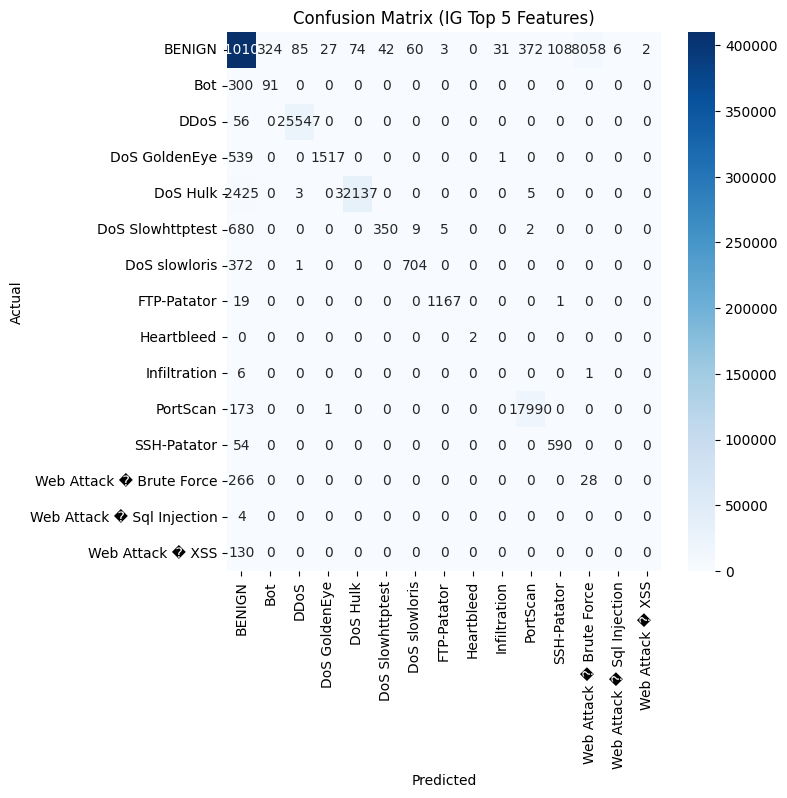


----- Training Models for IG Top 10 Features -----

Gradient Boosting Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.9888219984022931
Precision: 0.9879583438420518
Recall: 0.9888219984022931
F1 Score: 0.9878000801915655


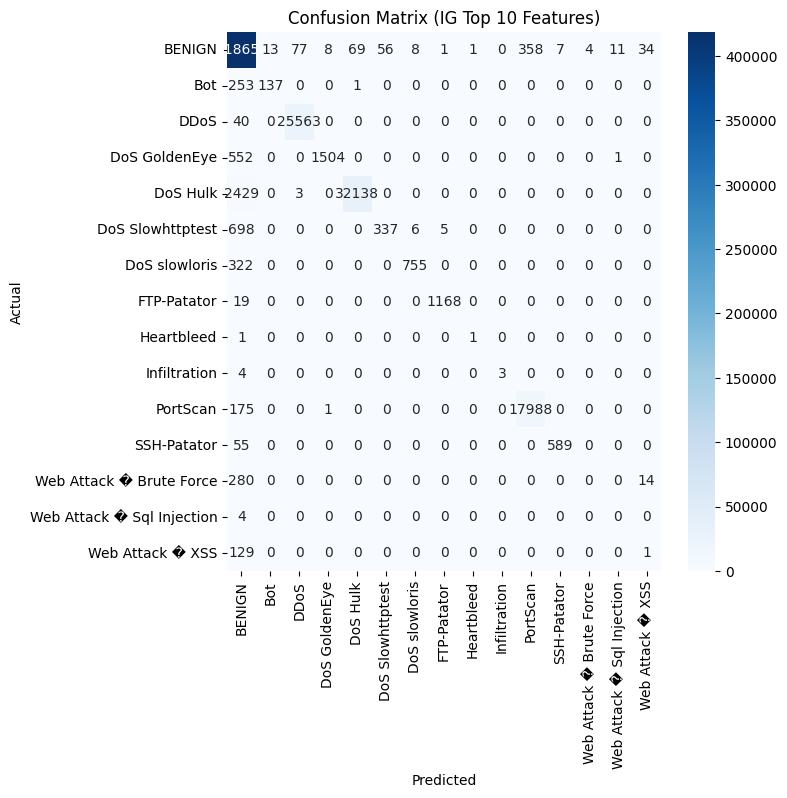


----- Training Models for KBest Top 5 Features -----


In [ ]:
import time
from sklearn.ensemble import GradientBoostingClassifier
import sys
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix


# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Models for {name} -----")

    start_time = time.time()

    GradientB_model= GradientBoostingClassifier()

    GradientB_model.fit(X_tr, y_train)
    train_end_time = time.time()

    y_pred_enc = GradientB_model.predict(X_te)
    pred_end_time = time.time()

    metrics = evaluate_model(y_test, y_pred_enc, f"Gradient Boosting Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, y_pred_enc, le.classes_, f"Confusion Matrix ({name})")


In [ ]:

# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Gradient_ensemble_classifier_evaluation_summary.csv", index=False)
